<a href="https://colab.research.google.com/github/kenleytaniar/Data_science/blob/main/capstone_bengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploratory Data Analysis (EDA)**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [2]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive # library untuk mengakses Google Drive dari Google Colab.
drive.mount('/content/drive') # mount Google Drive agar file di dalamnya dapat diakses.

# dir adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
dir = '/content/drive/My Drive/dataset_bengkod/ObesityDataSet.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

Mounted at /content/drive


In [3]:

# Load dataset
ori_data = pd.read_csv(dir)

# Simbol umum yang menunjukkan nilai hilang
missing_symbols = ['?', 'NA', 'N/A', '-', '--', 'null', 'Null', 'none', 'None', '']

# Ganti simbol tersebut dengan NaN
df = ori_data.replace(missing_symbols, np.nan)


In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2089 non-null   object
 1   Gender                          2089 non-null   object
 2   Height                          2089 non-null   object
 3   Weight                          2092 non-null   object
 4   CALC                            2091 non-null   object
 5   FAVC                            2089 non-null   object
 6   FCVC                            2093 non-null   object
 7   NCP                             2089 non-null   object
 8   SCC                             2093 non-null   object
 9   SMOKE                           2098 non-null   object
 10  CH2O                            2096 non-null   object
 11  family_history_with_overweight  2088 non-null   object
 12  FAF                             2092 non-null   

In [7]:
df.describe(include='all')

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2089,2089,2089,2092,2091,2089,2093,2089,2093,2098,2096,2088,2092,2096,2093,2099,2111
unique,1393,2,1561,1517,4,2,807,636,2,2,1262,2,1185,1129,4,5,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [9]:
df.nunique()

,0
Age,1393
Gender,2
Height,1561
Weight,1517
CALC,4
FAVC,2
FCVC,807
NCP,636
SCC,2
SMOKE,2


In [10]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight
460,18,Female,1.62,55,no,yes,2,3,no,no,1,yes,1,1,Frequently,Public_Transportation,Normal_Weight
663,21,Female,1.52,42,Sometimes,yes,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
763,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
764,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
824,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I


In [11]:
#konversi object ke int
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['FCVC'] = pd.to_numeric(df['FCVC'], errors='coerce')
df['NCP'] = pd.to_numeric(df['NCP'], errors='coerce')
df['CH2O'] = pd.to_numeric(df['CH2O'], errors='coerce')
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [45]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


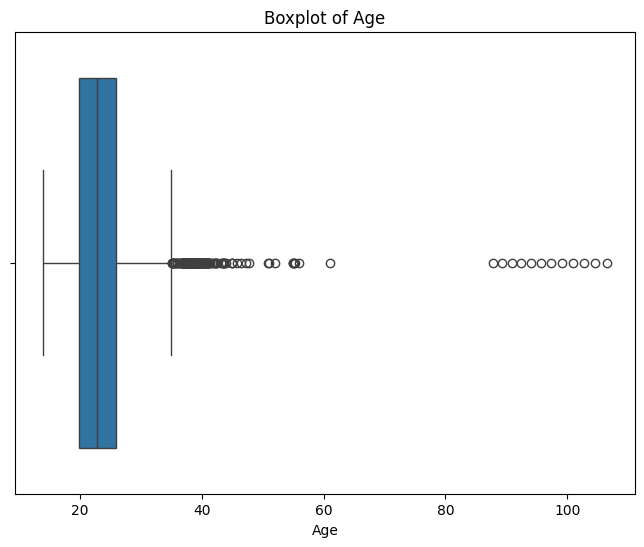

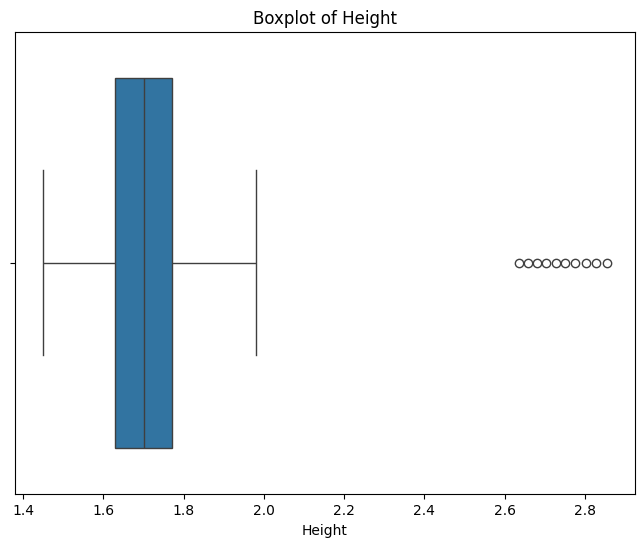

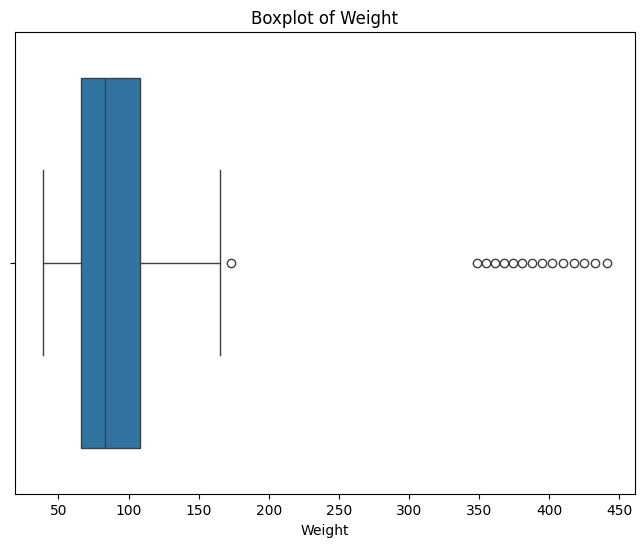

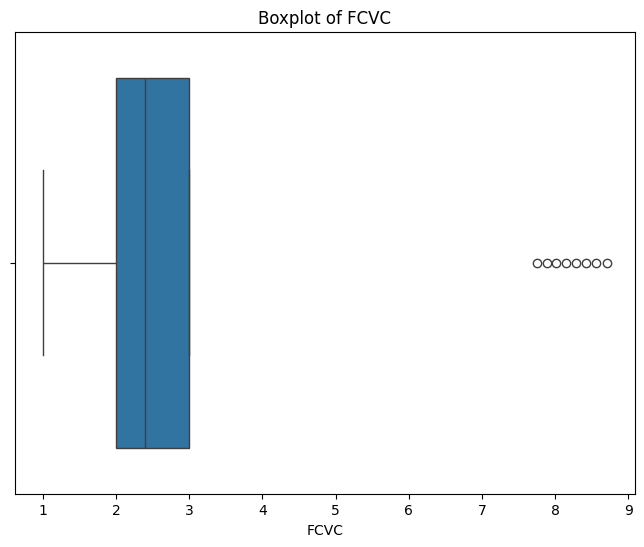

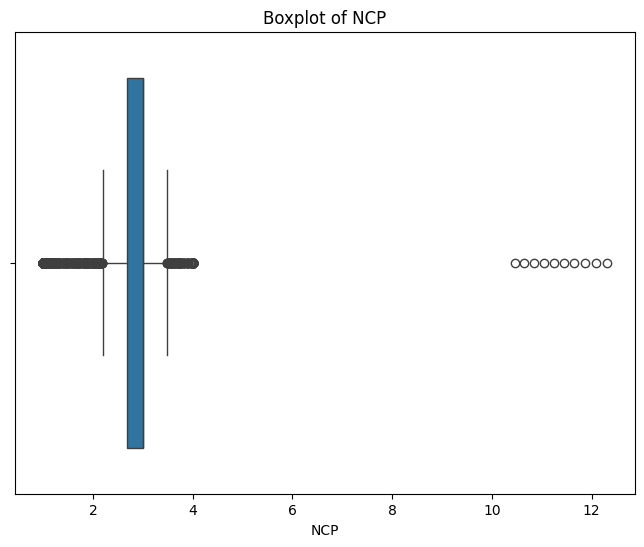

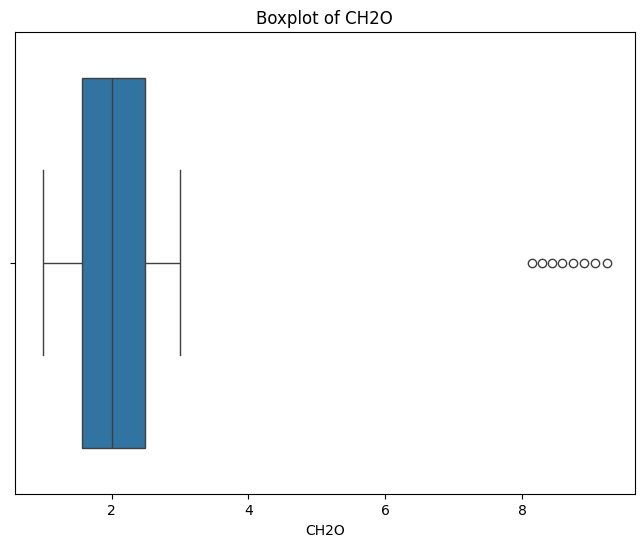

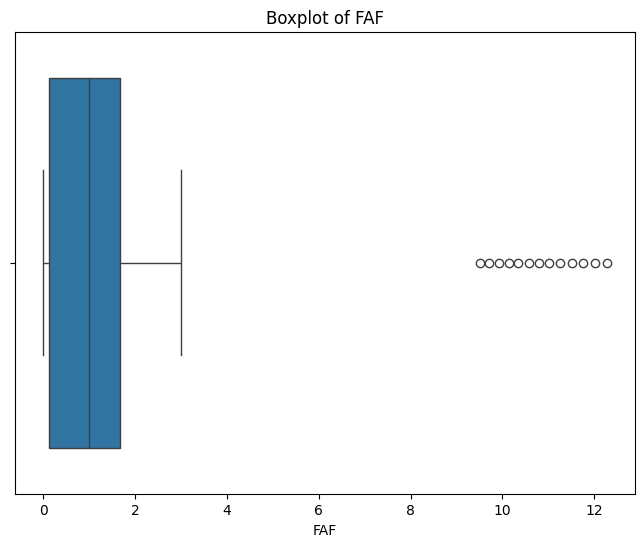

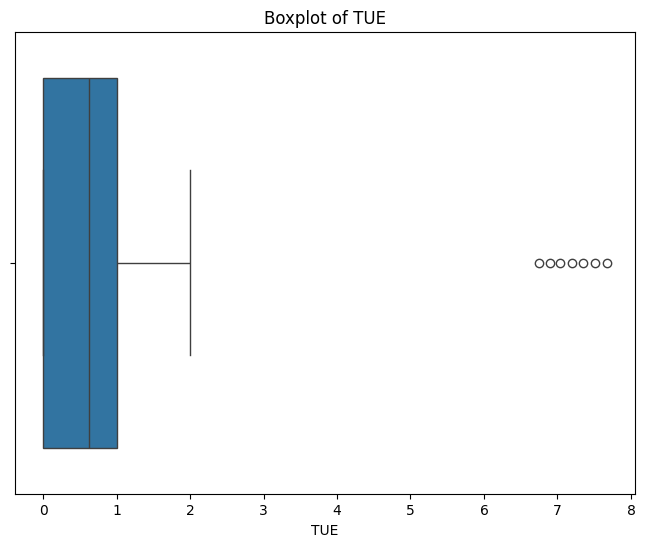

In [47]:
#cek outlier data
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]


#visualisasi
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# **2. Preprocessing Data**

In [68]:
df_clean = df.copy()

In [69]:
from sklearn.impute import SimpleImputer

#imputasi data numerik
imputer = SimpleImputer(strategy='mean')
df_clean[num_cols] = imputer.fit_transform(df_clean[num_cols])

#imputasi data kate
imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = imputer.fit_transform(df_clean[cat_cols])


In [70]:
df_clean.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

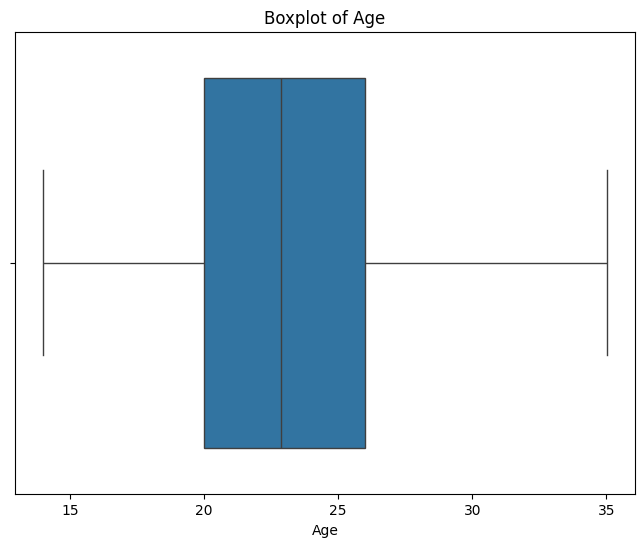

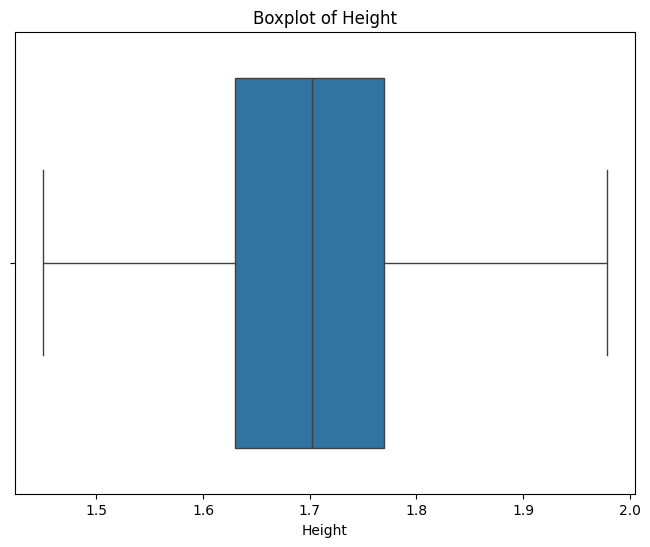

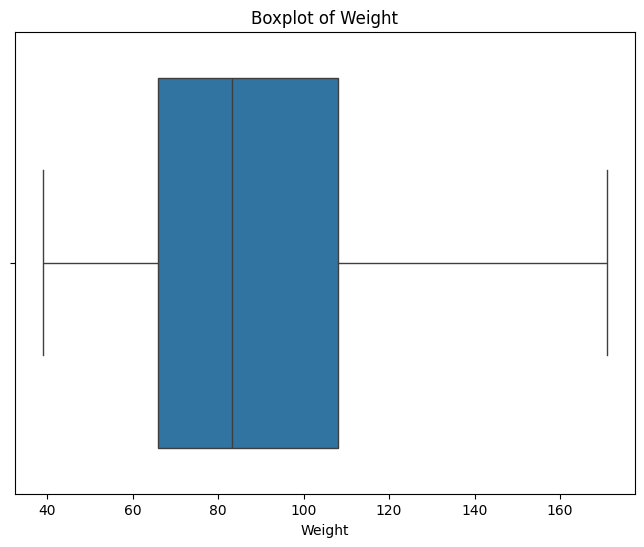

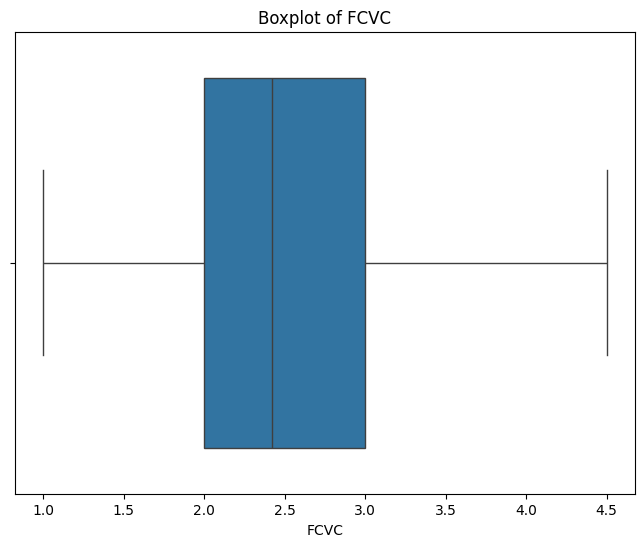

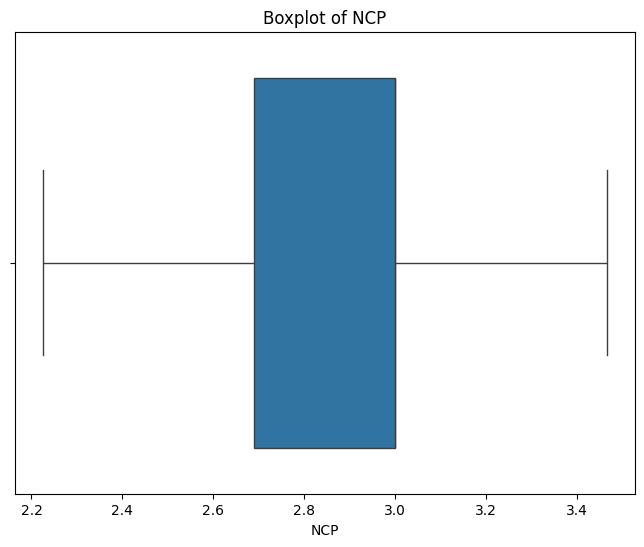

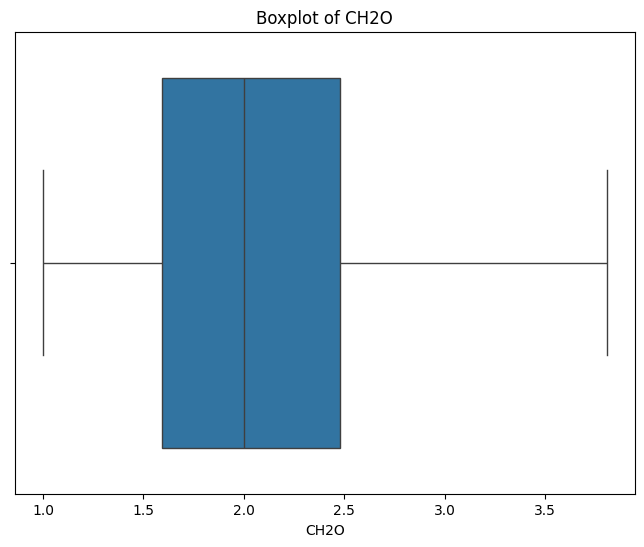

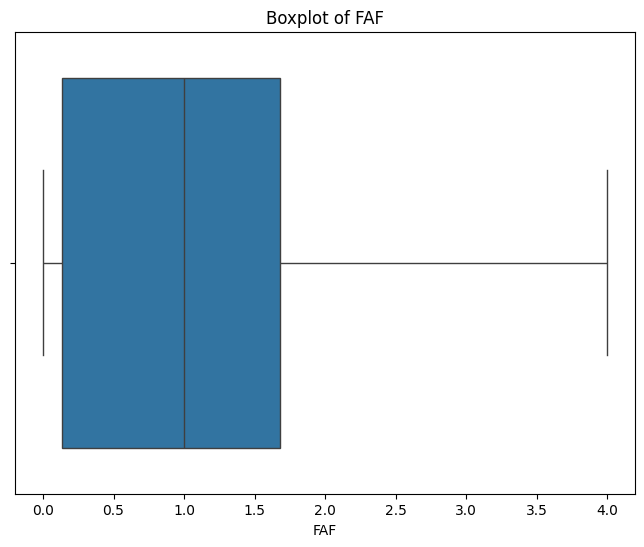

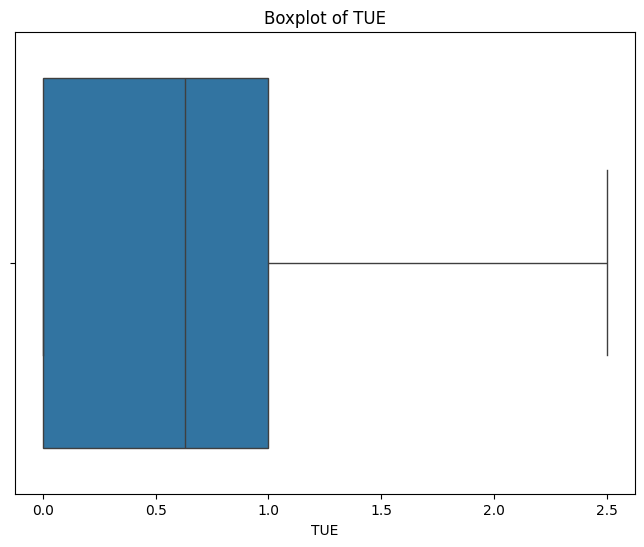

In [72]:
#mengatasi outlier
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = np.where(df_clean[col] < lower, lower, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper, upper, df_clean[col])

#visual
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# **3. Pemodelan dan Evaluasi**

In [99]:
#labeling
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

x = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_resampled = scaler.fit_transform(x_resampled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)



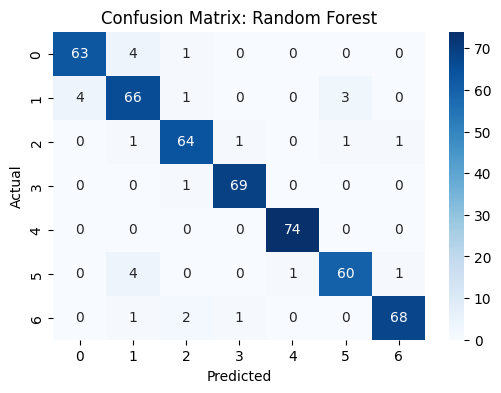


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.87      0.89      0.88        74
           2       0.93      0.94      0.93        68
           3       0.97      0.99      0.98        70
           4       0.99      1.00      0.99        74
           5       0.94      0.91      0.92        66
           6       0.97      0.94      0.96        72

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



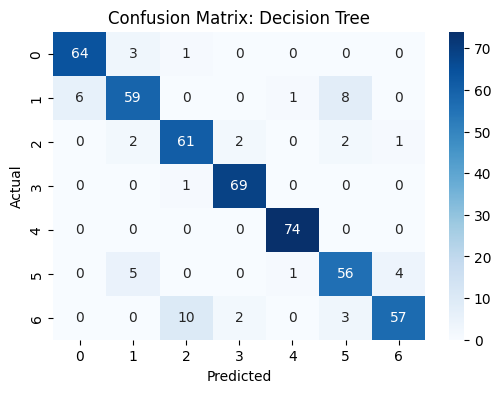


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        68
           1       0.86      0.80      0.83        74
           2       0.84      0.90      0.87        68
           3       0.95      0.99      0.97        70
           4       0.97      1.00      0.99        74
           5       0.81      0.85      0.83        66
           6       0.92      0.79      0.85        72

    accuracy                           0.89       492
   macro avg       0.89      0.89      0.89       492
weighted avg       0.89      0.89      0.89       492



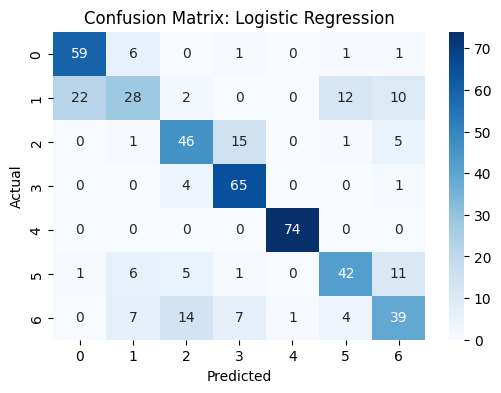


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        68
           1       0.58      0.38      0.46        74
           2       0.65      0.68      0.66        68
           3       0.73      0.93      0.82        70
           4       0.99      1.00      0.99        74
           5       0.70      0.64      0.67        66
           6       0.58      0.54      0.56        72

    accuracy                           0.72       492
   macro avg       0.71      0.72      0.71       492
weighted avg       0.71      0.72      0.71       492



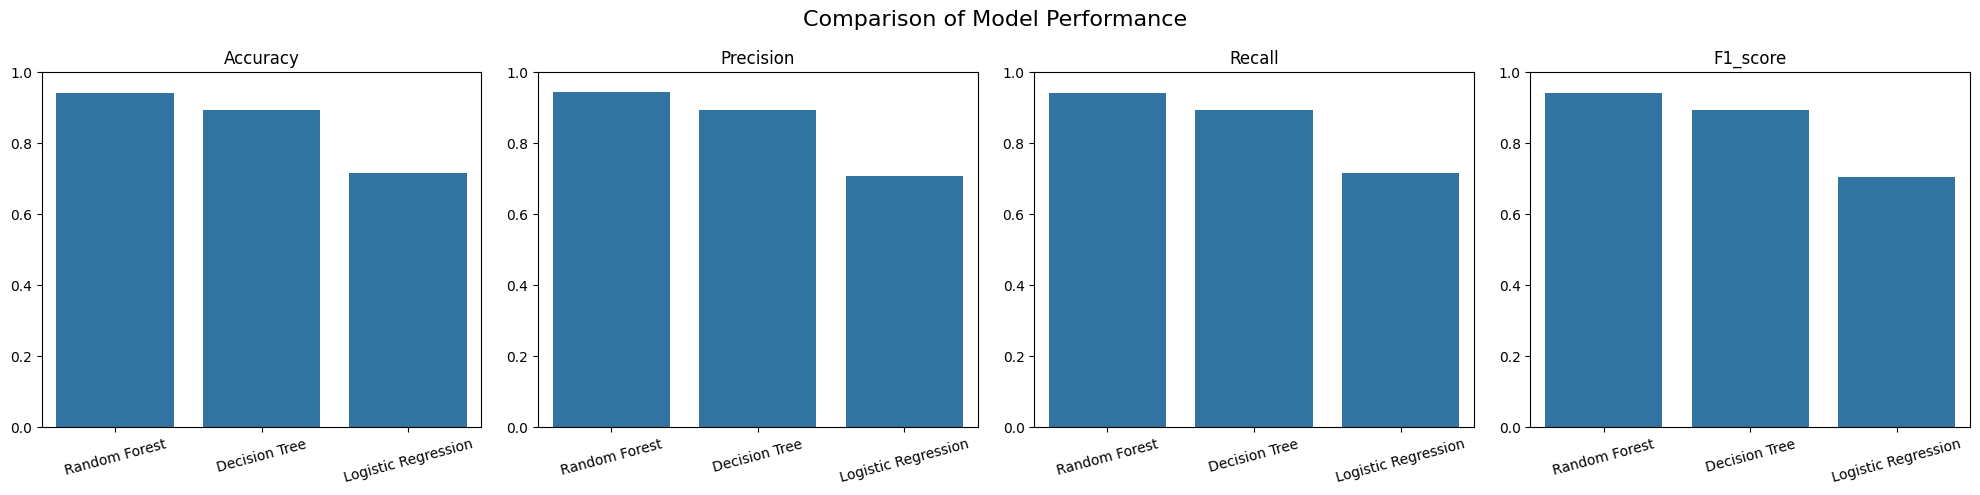

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluasi metrik
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil
    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "y_pred": y_pred
    }

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Optional: print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Visualisasi Perbandingan Metrik
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
metrics = ["accuracy", "precision", "recall", "f1_score"]

for ax, metric in zip(axes, metrics):
    scores = [results[model][metric] for model in models]
    sns.barplot(x=list(models.keys()), y=scores, ax=ax)
    ax.set_title(metric.capitalize())
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=15)

plt.suptitle("Comparison of Model Performance", fontsize=16)
plt.tight_layout()
plt.show()

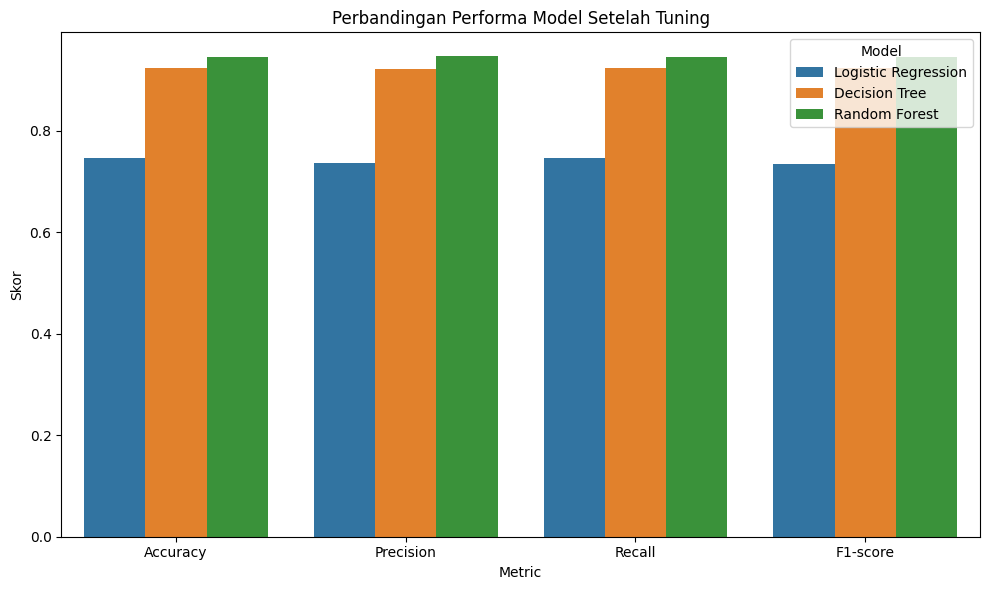

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.745935   0.735787  0.746744  0.734894
1        Decision Tree  0.922764   0.922222  0.923148  0.922418
2        Random Forest  0.945122   0.946220  0.944794  0.945090


In [97]:
models_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
             'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]
        }
    }
}

# 7. Latih dan evaluasi
best_models = {}
results = []

for name, mp in models_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)

    best_models[name] = clf.best_estimator_
    y_pred = clf.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": np.mean([v["precision"] for k, v in report.items() if k.isdigit()]),
        "Recall": np.mean([v["recall"] for k, v in report.items() if k.isdigit()]),
        "F1-score": np.mean([v["f1-score"] for k, v in report.items() if k.isdigit()])
    })

# 8. Visualisasi
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Perbandingan Performa Model Setelah Tuning")
plt.ylabel("Skor")
plt.xlabel("Metric")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

print(results_df)

In [100]:

from sklearn.preprocessing import LabelEncoder

joblib.dump(best_models["Random Forest"], "model.pkl")

joblib.dump(scaler, "scaler.pkl")

joblib.dump(label_encoders, "label.pkl")

['label.pkl']